### Import the libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

### Load the dataset

In [3]:
movie = pd.read_csv("ml-20m/Movies.csv")
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv("ml-20m/Ratings.csv")
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
tags = pd.read_csv("ml-20m/Tags.csv")
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


### Display the Training and Testing Ratings data

In [6]:
ratings_1m = ratings.sample(n=1000000, random_state=40)

In [7]:
ratings_train, ratings_test = train_test_split(ratings_1m, test_size=0.2, random_state=40)

In [8]:
ratings_train.shape, ratings_test.shape

((800000, 4), (200000, 4))

### Unique users

In [9]:
n_users = ratings.userId.unique().shape[0]
n_users

138493

### Unique items / movies?

In [10]:
n_items = ratings.movieId.unique().shape[0]
n_items

26744

### Create a User-Item Matrix

In [11]:
from scipy.sparse import csr_matrix

In [12]:
user_movies_data = ratings_1m.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)

In [13]:
user_movies_data

userId,1,2,3,5,6,7,8,9,10,11,...,138483,138484,138485,138486,138487,138488,138489,138490,138492,138493
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 1. Content Filtering

### Data Preparation
Prepare data for Metadata to have a TF-IDF Vectorizer for Content Filtering

In [15]:
unique_movie_ids = ratings_1m['movieId'].unique()

# Filter the movie DataFrame based on the unique movieIds in the rating DataFrame
movie = movie[movie['movieId'].isin(unique_movie_ids)]

In [16]:
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27225,131100,Forget me not (2013),Documentary
27229,131108,The Fearless Four (1997),(no genres listed)
27260,131170,Parallels (2015),Sci-Fi
27264,131180,Dead Rising: Watchtower (2015),Action|Horror|Thriller


In [17]:
unique_genres = set()
for genres in movie['genres'].str.split('|'):
    unique_genres = unique_genres.union(genres)

In [18]:
for genre in unique_genres:
    movie[genre] = movie['genres'].str.contains(genre).astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_19780\640830871.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  movie[genre] = movie['genres'].str.contains(genre).astype(int)


In [19]:
movie.drop('genres', axis=1, inplace=True)

In [20]:
movie['metadata'] = ""

In [21]:
movie.columns.tolist()

['movieId',
 'title',
 'Adventure',
 '(no genres listed)',
 'Fantasy',
 'Musical',
 'IMAX',
 'Romance',
 'Western',
 'Mystery',
 'Horror',
 'Drama',
 'Film-Noir',
 'Crime',
 'Sci-Fi',
 'Documentary',
 'War',
 'Thriller',
 'Animation',
 'Children',
 'Action',
 'Comedy',
 'metadata']

In [22]:
def metadata_Action(x):
    if x == 1:
        return "Action"
    else:
        return " "

In [23]:
movie['metadata_Action'] = movie.Action.apply(metadata_Action)

In [24]:
def metadata_Adventure(x):
    if x == 1:
        return " Adventure "
    else:
        return " "
    
movie['metadata_Adventure'] = movie.Adventure.apply(metadata_Adventure)

In [25]:
genres = ['IMAX',
 'Mystery',
 'Western',
 'Film-Noir',
 'Crime',
 'Animation',
 'Horror',
 'Documentary',
 'Musical',
 'Thriller',
 'Fantasy',
 'Romance',
 'Action',
 'Drama',
 'Adventure',
 'War',
 'Comedy',
 'Sci-Fi',
 'Children']

In [26]:
def metadata_IMAX(x):
    if x == 1:
        return " IMAX "
    else:
        return " "
movie['metadata_IMAX'] = movie.IMAX.apply(metadata_IMAX)

In [27]:
def metadata_Animation(x):
    if x == 1:
        return " Animation "
    else:
        return " "
movie['metadata_Animation'] = movie.Animation.apply(metadata_Animation)

In [28]:
def metadata_Childrens(x):
    if x == 1:
        return " Children "
    else:
        return " "
    
movie["metadata_Children"] = movie["Children"].apply(metadata_Childrens)

In [29]:
def metadata_Comedy(x):
    if x == 1:
        return " Comedy "
    else:
        return " "

movie['metadata_Comedy'] = movie.Comedy.apply(metadata_Comedy)

In [30]:
def metadata_Crime(x):
    if x == 1:
        return " Crime "
    else:
        return " "
    
movie['metadata_Crime'] = movie.Crime.apply(metadata_Crime)

In [31]:
def metadata_Documentary(x):
    if x == 1:
        return " Documentary "
    else:
        return " "
    
movie['metadata_Documentary'] = movie.Documentary.apply(metadata_Documentary)

In [32]:
def metadata_Drama(x):
    if x == 1:
        return " Drama "
    else:
        return " "
    
movie['metadata_Drama'] = movie.Drama.apply(metadata_Drama)

In [33]:
def metadata_Fantasy(x):
    if x == 1:
        return " Fantasy "
    else:
        return " "
    
movie['metadata_Fantasy'] = movie.Fantasy.apply(metadata_Fantasy)

In [34]:
def metadata_FilmNoir(x):
    if x == 1:
        return " Film-Noir "
    else:
        return " "
    
movie['metadata_Film-Noir'] = movie["Film-Noir"].apply(metadata_FilmNoir)

In [35]:
def metadata_Horror(x):
    if x == 1:
        return "Horror "
    else:
        return " "

movie['metadata_Horror'] = movie.Horror.apply(metadata_Horror)

In [36]:
def metadata_Musical(x):
    if x == 1:
        return " Musical "
    else:
        return " "
    
movie['metadata_Musical'] = movie.Musical.apply(metadata_Musical)

In [37]:
def metadata_Mystery(x):
    if x == 1:
        return " Mystery "
    else:
        return " "
    
movie['metadata_Mystery'] = movie.Mystery.apply(metadata_Mystery)

In [38]:
def metadata_Romance(x):
    if x == 1:
        return " Romance "
    else:
        return " "
    
movie['metadata_Romance'] = movie.Romance.apply(metadata_Romance)

In [39]:
def metadata_SciFi(x):
    if x == 1:
        return " Sci-Fi "
    else:
        return " "
    
movie['metadata_Sci-Fi'] = movie["Sci-Fi"].apply(metadata_SciFi)

In [40]:
def metadata_Thriller(x):
    if x == 1:
        return " Thriller "
    else:
        return " "
    
movie['metadata_Thriller'] = movie.Thriller.apply(metadata_Thriller)

In [41]:
def metadata_War(x):
    if x == 1:
        return " War "
    else:
        return " "
    
movie['metadata_War'] = movie.War.apply(metadata_War)

In [42]:
def metadata_Western(x):
    if x == 1:
        return " Western "
    else:
        return " "
    
movie['metadata_Western'] = movie.Western.apply(metadata_Western)

In [43]:
movie['full_metadata'] = movie[['metadata_Action', 'metadata_Adventure',
'metadata_Animation', 'metadata_Children', 'metadata_Comedy', 'metadata_Crime', 'metadata_Documentary', 'metadata_Drama', 'metadata_Fantasy',
'metadata_Film-Noir', 'metadata_Horror', 'metadata_Musical', 'metadata_Mystery', 'metadata_Romance', 'metadata_Sci-Fi', 'metadata_Thriller', 'metadata_War', 'metadata_Western', 'metadata_IMAX']].apply(
                                          lambda x: ' '.join(x), axis = 1)
                                
                                

In [44]:
movie

,movieId,title,Adventure,(no genres listed),Fantasy,Musical,IMAX,Romance,Western,Mystery,...,metadata_Film-Noir,metadata_Horror,metadata_Musical,metadata_Mystery,metadata_Romance,metadata_Sci-Fi,metadata_Thriller,metadata_War,metadata_Western,full_metadata
0,1,Toy Story (1995),1,0,1,0,0,0,0,0,...,,,,,,,,,,Adventure Animation Children Comedy ...
1,2,Jumanji (1995),1,0,1,0,0,0,0,0,...,,,,,,,,,,Adventure Children Fantasy ...
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,,,,,Romance,,,,,Comedy Romance ...
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,,,,,Romance,,,,,Comedy Drama Romanc...
4,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,...,,,,,,,,,,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27225,131100,Forget me not (2013),0,0,0,0,0,0,0,0,...,,,,,,,,,,Documentary
27229,131108,The Fearless Four (1997),0,1,0,0,0,0,0,0,...,,,,,,,,,,
27260,131170,Parallels (2015),0,0,0,0,0,0,0,0,...,,,,,,Sci-Fi,,,,Sci-Fi
27264,131180,Dead Rising: Watchtower (2015),0,0,0,0,0,0,0,0,...,,Horror,,,,,Thriller,,,Action Horror Thri...


## TF-IDF Vectorizer on Metadata

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movie['full_metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=movie.index.tolist())
print(tfidf_df.shape)

(15320, 21)


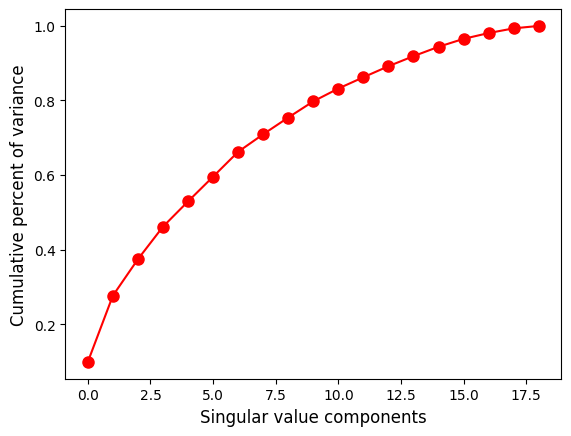

In [46]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=19)
latent_matrix = svd.fit_transform(tfidf_df)
# plot var expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [47]:
n = 20
latent_matrix_1_df = pd.DataFrame(latent_matrix[:,0:n], index=movie.title.tolist())

In [48]:
latent_matrix_1_df.shape

(15320, 19)

## 2. Collaborative Filtering
- Use user_movies_data

In [49]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)
latent_matrix_2 = svd.fit_transform(user_movies_data)
latent_matrix_2_df = pd.DataFrame(
                             latent_matrix_2, index=movie.title.tolist())

In [50]:
latent_matrix_2_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),36.540287,-2.813244,-0.965685,-4.077147,-0.193435,3.927711,0.085893,6.763195,-7.503362,-3.935711,...,-0.003084,0.619296,0.193151,0.097787,0.251276,0.428127,-0.120528,-0.311514,-0.241733,0.540436
Jumanji (1995),12.880943,-0.114212,-1.006298,0.000508,0.029331,-1.167301,0.844723,2.662152,-0.944666,-1.033744,...,-23.954701,-6.939939,-4.240031,-19.255473,14.761843,-4.235873,-2.678219,-25.816956,30.580976,-12.360143
Grumpier Old Men (1995),5.530679,-0.237435,-0.734048,-0.006708,0.129008,-0.110488,0.833188,0.879685,0.148497,-0.646736,...,-1.751228,0.627250,0.142660,1.353556,0.659697,-1.189647,0.251056,0.901115,1.042181,-0.904968
Waiting to Exhale (1995),1.257934,0.151983,-0.192599,0.010813,0.055283,-0.128481,0.256977,0.475291,-0.059622,-0.223085,...,-0.320737,0.126862,0.471846,0.408497,0.123689,0.134663,0.162653,-0.096482,-0.011704,0.006681
Father of the Bride Part II (1995),4.427571,-0.172487,-0.192261,0.154635,0.509024,0.545875,0.826010,1.166977,0.108601,-0.754869,...,-0.313975,0.282954,1.639672,0.471247,-1.222604,0.251934,-0.689273,0.502863,0.740992,-0.626523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Forget me not (2013),0.022481,-0.005787,-0.002789,0.007609,0.055508,0.003960,-0.008513,-0.006710,0.000472,-0.003589,...,-0.010106,-0.033168,-0.009474,0.027070,-0.001794,-0.001152,0.008451,0.016179,-0.021097,0.012157
The Fearless Four (1997),0.019270,-0.004960,-0.002390,0.006522,0.047579,0.003394,-0.007297,-0.005751,0.000405,-0.003076,...,-0.008662,-0.028430,-0.008120,0.023203,-0.001538,-0.000988,0.007244,0.013868,-0.018083,0.010420
Parallels (2015),0.012325,-0.003800,-0.005285,-0.004668,-0.002481,-0.001636,-0.005704,-0.004600,-0.000584,-0.002623,...,-0.027250,-0.033231,0.047431,-0.011650,-0.010335,-0.002553,-0.018445,0.025950,-0.029463,-0.008210
Dead Rising: Watchtower (2015),0.038293,-0.009836,-0.012382,-0.010123,-0.006163,-0.015259,-0.008382,0.028469,-0.016318,0.015281,...,-0.011388,0.018508,-0.029202,-0.016482,-0.024010,-0.034866,-0.004104,-0.038455,-0.001618,0.017947


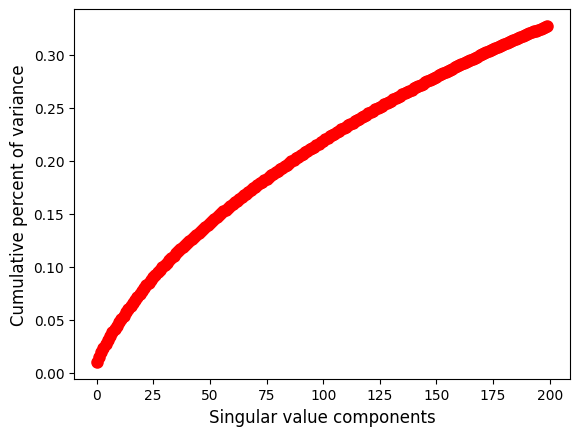

In [51]:
# plot variance expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()


In [52]:
from sklearn.metrics.pairwise import cosine_similarity
# take the latent vectors for a selected movie from both content 
# and collaborative matrixes
a_1 = np.array(latent_matrix_1_df.loc['Toy Story (1995)']).reshape(1, -1)
a_2 = np.array(latent_matrix_2_df.loc["Toy Story (1995)"]).reshape(1, -1)

# calculate the similartity of this movie with the others in the list
score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

# an average measure of both content and collaborative 
hybrid = ((score_1 + score_2)/2.0)

# form a data frame of similar movies 
dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid} 
# dictDf = {'collaborative': score_2} 
similar = pd.DataFrame(dictDf, index = latent_matrix_2_df.index )

#sort it on the basis of either: content, collaborative or hybrid, 
# here : content
similar.sort_values('content', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
Turbo (2013),1.0,-0.001521,0.499239
"Tale of Despereaux, The (2008)",1.0,0.002587,0.501294
Shrek the Third (2007),1.0,0.138992,0.569496
Toy Story Toons: Small Fry (2011),1.0,-0.000785,0.499608
Toy Story Toons: Hawaiian Vacation (2011),1.0,0.003300,0.501650
Asterix and the Vikings (Astérix et les Vikings) (2006),1.0,0.002217,0.501108
Toy Story 2 (1999),1.0,0.020674,0.510337
"Boxtrolls, The (2014)",1.0,0.106077,0.553038
Antz (1998),1.0,0.158215,0.579107
"Wild, The (2006)",1.0,0.001496,0.500748


In [53]:
similar.sort_values('collaborative', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
Covert Action (1978),0.000000e+00,0.988126,0.494063
"Only Son, The (Hitori musuko) (1936)",5.724587e-17,0.988110,0.494055
Copenhagen (2014),2.940125e-01,0.985112,0.639562
Swastika (1973),4.510281e-17,0.850514,0.425257
Tumannost Andromedy (1967),2.055211e-01,0.666718,0.436120
"Burial Ground (a.k.a. Zombie Horror) (a.k.a. Zombie 3) (Notti del Terrore, Le) (1981)",2.498002e-16,0.621294,0.310647
The Loft (2014),-4.440892e-16,0.492821,0.246410
Kids of the Round Table (1995),8.082559e-01,0.480102,0.644179
I Am Curious (Yellow) (Jag är nyfiken - en film i gult) (1967),7.632783e-17,0.479458,0.239729
Mentiras y gordas (2009),1.410569e-01,0.477367,0.309212


In [54]:
similar.sort_values('hybrid', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
Kids of the Round Table (1995),0.808256,0.480102,0.644179
Copenhagen (2014),0.294012,0.985112,0.639562
Bionicle: Mask of Light (Bionicle: Mask of Light - The Movie) (2003),0.901331,0.366627,0.633979
Atlantis: Milo's Return (2003),0.938357,0.276809,0.607583
Home (2015),0.745251,0.428670,0.586961
Gnomeo & Juliet (2011),0.942733,0.221289,0.582011
Antz (1998),1.000000,0.158215,0.579107
"Pirates! Band of Misfits, The (2012)",0.878688,0.278631,0.578659
Hey Arnold! The Movie (2002),0.878688,0.275828,0.577258
Shrek the Third (2007),1.000000,0.138992,0.569496


## 3. Hybrid Recommendation System

In [55]:
def recommend_similar_movies(title):
    # take the latent vectors for a selected movie from both content 
    # and collaborative matrixes
    a_1 = np.array(latent_matrix_1_df.loc[title]).reshape(1, -1)
    a_2 = np.array(latent_matrix_2_df.loc[title]).reshape(1, -1)

    # calculate the similartity of this movie with the others in the list
    score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
    score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

    # an average measure of both content and collaborative 
    hybrid = ((score_1 + score_2)/2.0)

    # form a data frame of similar movies 
    dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid} 
    similar = pd.DataFrame(dictDf, index = latent_matrix_2_df.index )

    #sort it on the basis of either: content, collaborative or hybrid
    similar.sort_values('hybrid', ascending=False, inplace=True)

    print(similar[1:].head(11))

In [56]:
recommend_similar_movies("Toy Story (1995)")

                                                     content  collaborative  \
Kids of the Round Table (1995)                      0.808256       0.480102   
Copenhagen (2014)                                   0.294012       0.985112   
Bionicle: Mask of Light (Bionicle: Mask of Ligh...  0.901331       0.366627   
Atlantis: Milo's Return (2003)                      0.938357       0.276809   
Home (2015)                                         0.745251       0.428670   
Gnomeo & Juliet (2011)                              0.942733       0.221289   
Antz (1998)                                         1.000000       0.158215   
Pirates! Band of Misfits, The (2012)                0.878688       0.278631   
Hey Arnold! The Movie (2002)                        0.878688       0.275828   
Shrek the Third (2007)                              1.000000       0.138992   
Boxtrolls, The (2014)                               1.000000       0.106077   

                                                   

In [57]:
recommend_similar_movies("GoldenEye (1995)")

                                  content  collaborative    hybrid
Tough and Deadly (1995)          0.712043       0.590470  0.651256
Tomorrow Never Dies (1997)       1.000000       0.232749  0.616375
Licence to Kill (1989)           1.000000       0.220138  0.610069
Dr. No (1962)                    1.000000       0.191993  0.595997
Cutter, The (2005)               0.712043       0.470013  0.591028
Diamonds Are Forever (1971)      1.000000       0.181193  0.590596
Die Another Day (2002)           1.000000       0.181160  0.590580
World Is Not Enough, The (1999)  1.000000       0.163623  0.581811
Samson and Delilah (1996)        0.563100       0.588515  0.575808
Chain Reaction (1996)            1.000000       0.149329  0.574664
Live and Let Die (1973)          1.000000       0.147772  0.573886


## Surprise

In [58]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

In [59]:
ratings_1m

,userId,movieId,rating,timestamp
17791492,122995,53972,2.5,1225082748
16730646,115754,6734,4.0,1073419005
19629608,135889,5010,4.5,1372170756
19387010,134209,1307,3.0,1183509577
12687603,87681,6156,5.0,1046856883
...,...,...,...,...
19074527,131943,2174,3.5,1220422068
9260290,64005,2688,1.0,1028676283
12272803,84785,235,4.0,1196305193
7325342,50565,1,5.0,940061161


In [60]:
movie

,movieId,title,Adventure,(no genres listed),Fantasy,Musical,IMAX,Romance,Western,Mystery,...,metadata_Film-Noir,metadata_Horror,metadata_Musical,metadata_Mystery,metadata_Romance,metadata_Sci-Fi,metadata_Thriller,metadata_War,metadata_Western,full_metadata
0,1,Toy Story (1995),1,0,1,0,0,0,0,0,...,,,,,,,,,,Adventure Animation Children Comedy ...
1,2,Jumanji (1995),1,0,1,0,0,0,0,0,...,,,,,,,,,,Adventure Children Fantasy ...
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,,,,,Romance,,,,,Comedy Romance ...
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,,,,,Romance,,,,,Comedy Drama Romanc...
4,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,...,,,,,,,,,,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27225,131100,Forget me not (2013),0,0,0,0,0,0,0,0,...,,,,,,,,,,Documentary
27229,131108,The Fearless Four (1997),0,1,0,0,0,0,0,0,...,,,,,,,,,,
27260,131170,Parallels (2015),0,0,0,0,0,0,0,0,...,,,,,,Sci-Fi,,,,Sci-Fi
27264,131180,Dead Rising: Watchtower (2015),0,0,0,0,0,0,0,0,...,,Horror,,,,,Thriller,,,Action Horror Thri...


In [61]:
Mapping_file = dict(zip(movie.title.tolist(), movie.movieId.tolist()))

In [62]:
# instantiate a reader and read in our rating data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_1m[['userId','movieId','rating']], reader)

# train SVD on 75% of known rates
trainset, testset = train_test_split(data, test_size=.25)
algorithm = SVD()
algorithm.fit(trainset)
predictions = algorithm.test(testset)

# check the accuracy using Root Mean Square Error
accuracy.rmse(predictions)

RMSE: 0.9112


0.911222639605902

In [63]:
def pred_user_rating(ui):
    if ui in ratings.userId.unique():
        ui_list = ratings[ratings.userId == ui].movieId.tolist()
        d = {k: v for k,v in Mapping_file.items() if not v in ui_list}        
        predictedL = []
        for i, j in d.items():     
            predicted = algorithm.predict(ui, j)
            predictedL.append((i, predicted[3])) 
        pdf = pd.DataFrame(predictedL, columns = ['movies', 'ratings'])
        pdf.sort_values('ratings', ascending=False, inplace=True)  
        pdf.set_index('movies', inplace=True)    
        return pdf.head(10)        
    else:
        print("User Id does not exist in the list!")
        return None

In [64]:
userId = 1
pred_user_rating(userId)

,ratings
movies,
Forrest Gump (1994),4.866084
Annie Hall (1977),4.750801
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.735334
Band of Brothers (2001),4.690404
Faust (1926),4.659255
"Charlie Brown Christmas, A (1965)",4.632704
Ikiru (1952),4.631480
"Rules of the Game, The (La règle du jeu) (1939)",4.628141
"Conformist, The (Conformista, Il) (1970)",4.598800


In [65]:
pred_user_rating(50)

,ratings
movies,
Brazil (1985),4.799079
Band of Brothers (2001),4.751482
"Princess Bride, The (1987)",4.719067
Charade (1963),4.642567
"Fog of War: Eleven Lessons from the Life of Robert S. McNamara, The (2003)",4.615467
"Boot, Das (Boat, The) (1981)",4.593284
Who's Afraid of Virginia Woolf? (1966),4.570529
"Usual Suspects, The (1995)",4.567518
Sanjuro (Tsubaki Sanjûrô) (1962),4.557599


In [66]:
pred_user_rating(49)

,ratings
movies,
"Lord of the Rings: The Two Towers, The (2002)",4.575317
Rear Window (1954),4.475338
One Flew Over the Cuckoo's Nest (1975),4.448440
Blade Runner (1982),4.433041
Casablanca (1942),4.427067
"Godfather, The (1972)",4.398085
"Big Sleep, The (1946)",4.338101
"Wild Bunch, The (1969)",4.327248
"Philadelphia Story, The (1940)",4.326915


In [67]:
pred_user_rating(1)

,ratings
movies,
Forrest Gump (1994),4.866084
Annie Hall (1977),4.750801
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.735334
Band of Brothers (2001),4.690404
Faust (1926),4.659255
"Charlie Brown Christmas, A (1965)",4.632704
Ikiru (1952),4.631480
"Rules of the Game, The (La règle du jeu) (1939)",4.628141
"Conformist, The (Conformista, Il) (1970)",4.598800


In [68]:
pred_user_rating(915)

,ratings
movies,
"Big Lebowski, The (1998)",4.537154
"Shawshank Redemption, The (1994)",4.396117
"Godfather, The (1972)",4.366103
City Lights (1931),4.359068
"Third Man, The (1949)",4.341699
This Is Spinal Tap (1984),4.319407
Strangers on a Train (1951),4.311031
On the Waterfront (1954),4.299832
Fight Club (1999),4.286686
